# Scraping Wikipedia for World City Data

In [17]:
# Importing Cleaning Packages
import re
import pandas as pd

# Importing Data Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### Capture Wikpedia World Cities Data

In [18]:
wikipedia = "https://en.wikipedia.org/wiki/" # Wikipedia Root URL
cities = "List_of_largest_cities" # World Cities Sub-URL

tables = pd.read_html(wikipedia + cities)

cities_df = tables[3]  # Index of the cities data table

# Loop through each cell and remove brackets and their inner characters
for col in cities_df.columns:
    cities_df[col] = cities_df[col].apply(lambda x: re.sub(r'\[.*?\]', '', str(x)))

cities_df = cities_df.drop(columns=['Urban area[8]', 'Metropolitan area[d]']) # Drop unnecessary columns

C:\Users\Lucas\AppData\Local\Temp\ipykernel_21304\221942048.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  cities_df = cities_df.drop(columns=['Urban area[8]', 'Metropolitan area[d]']) # Drop unnecessary columns


### Resolve Double Header Problem & Clean Density Column

In [19]:
# Remove the first level of the MultiIndex for columns
cities_df.columns = cities_df.columns.droplevel(0)

# Remove non-numeric characters
cities_df['Density (/km2)'] = cities_df['Density (/km2)'].str.replace(',', '').str.replace(' ', '').str.replace('—', '')

# Remove empty rows
cities_df = cities_df[cities_df['Density (/km2)'].str.strip().astype(bool)]

# Convert the column to int
cities_df['Density (/km2)'] = cities_df['Density (/km2)'].astype(int)

### Clean Headers

In [20]:
# Function to replace anything within brackets with nothing
def remove_brackets(text):
    return text.split('[')[0].strip()

# Replace headers using list comprehension
cities_df.columns = [remove_brackets(col) for col in cities_df.columns]

# Function to replace anything within brackets with nothing and replace 'km2' with 'km^2'
def clean_header(header):
    header = header.split('[')[0].strip()  # Remove anything within brackets
    return header.replace('km2', 'km^2')   # Replace 'km2' with 'km^2'

# Replace headers using list comprehension
cities_df.columns = [clean_header(col) for col in cities_df.columns]

### Display & Save to CSV

In [21]:
# Display DataFrame
print(cities_df)

# Save the DataFrame to a CSV file
cities_df.to_csv('page-data/cities.csv', index=False)

           City        Country UN 2018 population estimates  \
0         Tokyo          Japan                     37468000   
1         Delhi          India                     28514000   
2      Shanghai          China                     25582000   
3     São Paulo         Brazil                     21650000   
4   Mexico City         Mexico                     21581000   
..          ...            ...                          ...   
75       Dalian          China                      5300000   
76   Washington  United States                      5207000   
78   Alexandria          Egypt                      5086000   
79        Jinan          China                      5052000   
80  Guadalajara         Mexico                      5023000   

               Definition Population Area (km^2)  Density (/km^2)  
0   Metropolis prefecture   13515271        2191             6169  
1   Municipal corporation   16753235        1484            11289  
2            Municipality   24870895   

### Question 1: Which countiees have the most number of large cities?

C:\Users\Lucas\AppData\Local\Temp\ipykernel_21304\1881206477.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="Blues_d")


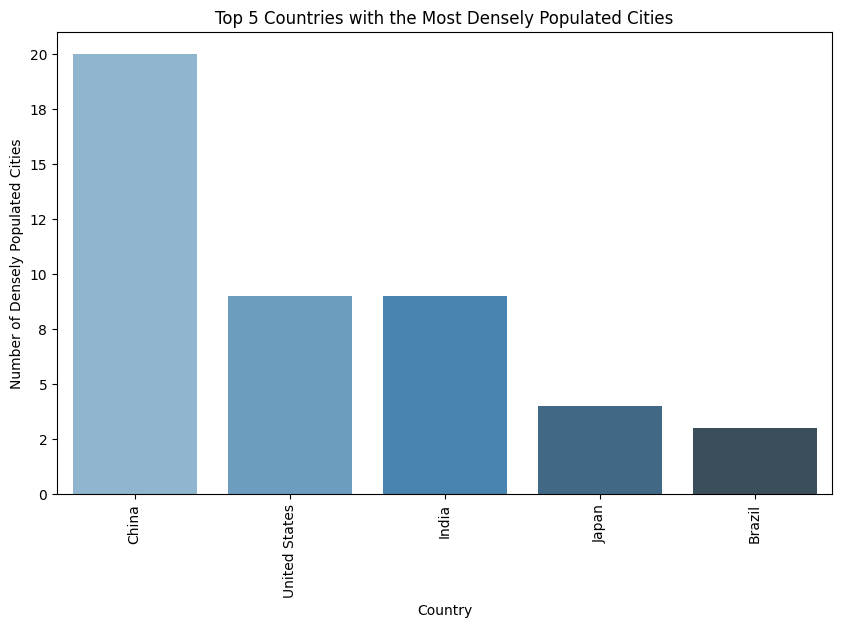

In [15]:
# Count the number of large cities in the DataFrame
country_counts = cities_df['Country'].value_counts()

# Select the top 5 countries with the most cities
top_countries = country_counts.nlargest(5)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Blues_d")

# Modify y-axis labels to display as integers instead of default decimal format
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Add labels and title
plt.title('Top 5 Countries with the Most Densely Populated Cities')
plt.xlabel('Country')
plt.ylabel('Number of Densely Populated Cities')
plt.xticks(rotation=90)
plt.show()